# P0: Preprocessing 

As you may have noticed, the data varied from sample to sample which may not reflect the reality. We may assume that all genes in a cell (or one sample) are in the range of [-1, +1], where -1 and +1 correspond to the min and max values of the sample. Preprocess both AD and normal datasets data first following the above scheme. You must use the normalized data for the problems below. 


## 0.1 data preprocessing for P1

In [14]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
import matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline
# Load the positive data
case = pd.read_csv('AD/case.gex',sep="\t", index_col=0)
case = case.T
case = case.iloc[:,1:]
# Data Profile
print " Case.gex has {} data points with {} variables each.".format(*case.shape)

 Case.gex has 176 data points with 8560 variables each.


In [16]:
# Load the negative data 
# ctrl = pd.read_csv('AD/ctrl.gex',sep=" ")
ctrl = pd.read_table('AD/ctrl.gex', delim_whitespace=True,index_col= 0)
ctrl = ctrl.T
#We are going to look at only the first 1800 genes
ctrl = ctrl.iloc[:,1:]
print "Ctrl.gex has {} data points with {} variables each.".format(*ctrl.shape)

Ctrl.gex has 188 data points with 8560 variables each.


In [17]:
# fill NA with 0
case = case.fillna(0)
case = case.astype(float)
ctrl = ctrl.fillna(0).replace('NA.54E-18', 0)
ctrl = ctrl.astype(float)

In [18]:
case.head(n = 5)

Arrays,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9257221-S,GI_9257224-S,GI_9257226-S,GI_9257237-S,GI_9257239-A,GI_9257241-S,GI_9257243-S,GI_9257244-A,GI_9257245-I,GI_9257247-S
WGAAD1,0.459128,0.037793,-0.005021,0.396483,0.294007,0.264442,0.435411,-0.535314,0.160456,-0.192909,...,-0.704773,-0.375528,-0.512366,0.240621,-0.030798,0.222405,-0.003962,0.357551,0.229804,-0.022661
WGAAD2,-1.984835,0.000000,0.076412,0.000000,-0.165882,0.422382,-0.248215,1.018655,-0.348808,0.311840,...,1.432851,1.489629,0.039887,-0.444673,-0.648194,0.000000,0.097790,0.434897,0.520602,-0.003774
WGAAD3,1.004902,0.425738,-0.099454,-0.170769,-0.731453,-0.253671,-0.320739,-0.520905,0.544893,-0.382786,...,-0.665363,-0.709330,0.202728,0.147759,0.366219,-0.256029,-0.091443,0.111414,-0.234035,-0.631229
WGAAD4,0.362306,0.170206,-0.120559,-0.103302,0.411346,-0.304337,-0.326257,-0.914469,0.181231,0.207712,...,-0.722825,-0.984980,-0.160732,-0.066951,0.096363,0.278873,0.026118,-0.002167,-0.123767,-0.103869
WGAAD5,-1.503368,-0.474718,0.193406,-0.469004,-0.345926,0.610511,-0.066067,0.441405,-0.357782,0.739501,...,0.824125,1.240139,1.094079,-0.156186,-0.416933,-1.045043,-0.023955,0.419680,-0.109643,0.438731


In [19]:
ctrl.head(n = 5)

Arrays,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9257221-S,GI_9257224-S,GI_9257226-S,GI_9257237-S,GI_9257239-A,GI_9257241-S,GI_9257243-S,GI_9257244-A,GI_9257245-I,GI_9257247-S
WGACON1,0.079152,0.471706,-0.132857,-0.419738,-0.787886,-0.176043,-0.425518,0.078899,-0.033934,-0.024021,...,-0.186855,0.052966,0.145435,0.048242,0.197562,0.689710,0.275101,-0.271202,0.175571,0.011876
WGACON2,0.126251,-0.108669,0.005476,0.017787,0.604684,-0.175319,-0.494687,-0.179354,0.269848,0.116990,...,-0.303510,-0.499177,0.042760,-0.012735,-0.072492,0.115757,0.120450,0.001390,-0.675676,0.078828
WGACON3,-0.151240,-0.125885,-0.093387,0.066375,0.087996,-0.232312,-0.156371,0.188970,-0.017033,-0.175991,...,0.123964,0.057025,0.211069,-0.229348,0.000166,-0.122356,-0.087322,-0.295549,-0.333897,0.231068
WGACON4,-0.354077,0.089749,0.108303,0.355191,0.128360,-0.031374,0.125896,-0.308253,0.246419,-0.224282,...,0.056242,-0.495116,0.245196,-0.023042,-0.032250,0.125361,-0.258821,0.391913,0.254455,-0.091534
WGACON5,0.311872,-0.009160,0.125547,0.008118,0.001867,0.121232,0.225809,-0.107844,0.117128,0.014256,...,-0.158861,-0.420297,0.335638,-0.068508,0.295196,-0.382245,-0.160408,-0.474907,0.054792,0.114987


In [20]:
# normalize the data so that all genes in a cell (or one sample) are in the range of [-1, +1]
# therefore, we need to normalize each row to be in range of [-1, +1]

# the norm function normalize the given array
def norm(array):
    new_array = 2 * (array - np.min(array)) / (np.max(array) - np.min(array)) - 1
    return new_array

In [21]:
norm_case = case.apply(norm, axis= 1)
norm_ctrl = ctrl.apply(norm, axis= 1)

In [22]:
# we need to transpose the original data, since in the problem 1, we will treat each gene as a point.
norm_case = norm_case.T
norm_ctrl = norm_ctrl.T

In [23]:
norm_case.to_csv("normcase.csv")
print " norm_case data(normalized case data) has {} points, each point has {} dimension each.".format(*norm_case.shape)

 norm_case data(normalized case data) has 8560 points, each point has 176 dimension each.


In [24]:
norm_ctrl.to_csv("normctrl.csv")
print " norm_ctrl data(normalized ctrl data) has {} points, each point has {} dimension each.".format(*norm_case.shape)

 norm_ctrl data(normalized ctrl data) has 8560 points, each point has 176 dimension each.


In [25]:
# show first 5 samples in normalized case data
norm_case.head(n = 5)

,WGAAD1,WGAAD2,WGAAD3,WGAAD4,WGAAD5,WGAAD6,WGAAD7,WGAAD8,WGAAD9,WGAAD10,...,WGAAD167,WGAAD168,WGAAD169,WGAAD170,WGAAD171,WGAAD172,WGAAD173,WGAAD174,WGAAD175,WGAAD176
Arrays,,,,,,,,,,,,,,,,,,,,,
GI_10047091-S,0.178456,-0.717688,0.636278,0.348570,-0.547576,0.599850,-0.032225,0.236502,0.389190,-0.085714,...,-0.169011,-0.350194,-0.608050,-0.274467,-0.497039,0.159421,0.034054,0.041610,0.202959,0.330105
GI_10047093-S,-0.050327,-0.121176,0.383781,0.265569,-0.252833,0.122321,0.136794,0.238378,0.369564,-0.010436,...,-0.001768,0.033758,-0.094415,-0.307197,-0.203649,0.069044,0.023604,0.023911,0.287386,0.020672
GI_10047103-S,-0.073574,-0.098212,0.154814,0.139937,-0.061392,0.342396,-0.221567,0.016356,0.401522,-0.030452,...,0.067694,0.052228,0.208087,-0.049482,-0.323556,-0.067029,0.006337,-0.090057,0.089202,0.006951
GI_10047133-A,0.144440,-0.121176,0.123723,0.147393,-0.251195,0.050377,0.014034,0.262041,0.238123,0.104170,...,-0.250395,0.193158,0.074018,-0.050427,-0.565183,-0.262741,0.003248,-0.115818,0.111696,0.097127
GI_10092596-S,0.088796,-0.171029,-0.120718,0.369759,-0.215929,0.356918,-0.309698,0.030442,0.452450,-0.083527,...,-0.286736,-0.057347,0.138369,0.108125,-0.357681,-0.019696,-0.026617,-0.073289,-0.200601,-0.068718


In [26]:
# show first 5 samples in normalized ctrl data
norm_ctrl.head(n = 5)

,WGACON1,WGACON2,WGACON3,WGACON4,WGACON5,WGACON6,WGACON7,WGACON8,WGACON9,WGACON10,...,WGACON179,WGACON180,WGACON181,WGACON182,WGACON183,WGACON184,WGACON185,WGACON186,WGACON187,WGACON188
Arrays,,,,,,,,,,,,,,,,,,,,,
GI_10047091-S,0.073631,0.125344,-0.103377,-0.131077,0.495709,-0.032562,0.072504,0.303613,0.327968,-0.003266,...,-0.209988,0.074437,-0.174502,-0.452220,-0.158310,0.244012,0.385559,0.406098,-0.397285,-0.315912
GI_10047093-S,0.262661,-0.022959,-0.094362,0.125503,0.334217,0.058645,0.024082,0.271535,0.317524,-0.143264,...,-0.105123,0.194317,0.167109,-0.197030,-0.147193,0.146226,-0.006735,0.218132,0.074408,-0.499774
GI_10047103-S,-0.028460,0.049100,-0.082808,0.136229,0.401980,-0.246392,0.021555,-0.021385,0.106530,-0.077272,...,0.071391,0.067335,0.058492,-0.210335,-0.360136,-0.235692,-0.087690,0.135082,-0.120198,-0.268348
GI_10047133-A,-0.166604,0.056871,-0.026007,0.278958,0.342908,-0.042703,0.160185,0.319237,0.483901,0.033548,...,-0.634426,-0.237445,0.015088,-0.212675,-0.113380,0.365559,-0.194414,0.458392,0.022901,-0.136446
GI_10092596-S,-0.343881,0.427375,-0.018320,0.147825,0.339763,-0.142796,0.029451,0.202389,0.304240,-0.389948,...,0.134585,0.102725,-0.068408,-0.253718,-0.170875,0.070780,0.176166,0.271607,-0.147253,0.014350


** Discussion **
After preprocessing, for each patient(each column), the max gene value is 1.0 and min gene value is -1.0.

## 0.2 data preprocessing for P2

In [27]:
#combine case data and ctrl data
frames = [norm_case.T, norm_ctrl.T]
train = pd.concat(frames)

In [28]:
print " train data has {} data points with {} variables each.".format(*train.shape)

 train data has 364 data points with 8560 variables each.


In [29]:
train.head(n = 5)

Arrays,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9257221-S,GI_9257224-S,GI_9257226-S,GI_9257237-S,GI_9257239-A,GI_9257241-S,GI_9257243-S,GI_9257244-A,GI_9257245-I,GI_9257247-S
WGAAD1,0.178456,-0.050327,-0.073574,0.144440,0.088796,0.072742,0.165578,-0.361521,0.016279,-0.175596,...,-0.453536,-0.274758,-0.349060,0.059808,-0.087571,0.049917,-0.073000,0.123300,0.053934,-0.083153
WGAAD2,-0.717688,-0.121176,-0.098212,-0.121176,-0.171029,0.005764,-0.195773,0.184965,-0.226005,-0.027457,...,0.309445,0.326509,-0.109189,-0.254816,-0.315981,-0.121176,-0.091787,0.009525,0.035283,-0.122310
WGAAD3,0.636278,0.383781,0.154814,0.123723,-0.120718,0.087580,0.058341,-0.028926,0.435729,0.031290,...,-0.091905,-0.111073,0.286555,0.262591,0.357832,0.086552,0.158306,0.246745,0.096140,-0.077023
WGAAD4,0.348570,0.265569,0.139937,0.147393,0.369759,0.060532,0.051061,-0.203089,0.270333,0.281774,...,-0.120285,-0.233555,0.122580,0.163100,0.233663,0.312521,0.203312,0.191091,0.138551,0.147149
WGAAD5,-0.547576,-0.252833,-0.061392,-0.251195,-0.215929,0.058123,-0.135740,0.009668,-0.219326,0.095083,...,0.119330,0.238533,0.196681,-0.161562,-0.236275,-0.416250,-0.123674,0.003443,-0.148226,0.008902


In [30]:
train.tail(n = 5)

Arrays,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9257221-S,GI_9257224-S,GI_9257226-S,GI_9257237-S,GI_9257239-A,GI_9257241-S,GI_9257243-S,GI_9257244-A,GI_9257245-I,GI_9257247-S
WGACON184,0.244012,0.146226,-0.235692,0.365559,0.070780,-0.022734,0.217214,-0.173791,0.032739,-0.118141,...,-0.220454,-0.421895,-0.147409,0.056223,0.123788,-0.141250,0.105911,-0.064712,-0.499589,-0.024540
WGACON185,0.385559,-0.006735,-0.087690,-0.194414,0.176166,0.166462,0.085316,-0.107278,0.117013,-0.100881,...,-0.199077,0.013149,0.262222,0.090302,0.092652,-0.424997,-0.107123,0.021890,0.127455,0.079462
WGACON186,0.406098,0.218132,0.135082,0.458392,0.271607,0.391987,0.266321,-0.128253,0.317509,0.298741,...,0.032837,-0.057029,0.143974,0.182217,0.152726,0.398491,0.019164,0.370222,0.495139,0.148072
WGACON187,-0.397285,0.074408,-0.120198,0.022901,-0.147253,-0.552705,-0.273313,0.011238,-0.130600,0.060534,...,-0.370836,-0.235905,-0.536915,-0.323108,0.005695,0.306038,-0.059975,-0.128557,0.181744,-0.055942
WGACON188,-0.315912,-0.499774,-0.268348,-0.136446,0.014350,-0.764358,-0.066075,-0.057797,-0.428686,-0.158254,...,-0.137022,-0.252871,-0.306599,-0.302600,-0.239579,-0.071849,-0.228395,-0.247978,-0.283830,-0.005337


# P1: Clustering using k-means 

In [110]:
from nltk.cluster.kmeans import KMeansClusterer
from nltk.cluster.util import cosine_distance
from nltk.cluster.util import euclidean_distance
from scipy.spatial import distance

## 1.0 Result
### step 1: run kmeans
This part of work was completed using nltk.cluster.kmeans module(http://www.nltk.org/api/nltk.cluster.html).

The K-means clusterer starts with k arbitrary chosen means then allocates each vector to the cluster with the closest mean. It then recalculates the means of each cluster as the centroid of the vectors in the cluster. This process repeats until the cluster memberships stabilise. This is a hill-climbing algorithm which may converge to a local maximum. Hence the clustering is often repeated with random initial means and the most commonly occurring output means are chosen.

A typical run looks like the code below:

``` python
clusterer = KMeansClusterer(k, distance = cosine_distance)
clusters = clusterer.cluster(norm_case.values, True, trace=True)
```

** I used default random initialization and covergence condition (conv_test = 1e-06) and repeats==5 **

### input for the function
``` python
        :param  num_means:  the number of means to use (may use fewer)
        :type   num_means:  int
        :param  distance:   measure of distance between two vectors
        :type   distance:   function taking two vectors and returing a float
        :param  repeats:    number of randomised clustering trials to use
        :type   repeats:    int
        
        :param  conv_test:  maximum variation in mean differences before
                            deemed convergent
        :type   conv_test:  number
        :param  initial_means: set of k initial means
        :type   initial_means: sequence of vectors
         :param  rng:        random number generator (or None)
        :type   rng:        Random
        :param avoid_empty_clusters: include current centroid in computation
                                     of next one; avoids undefined behavior
                                     when clusters become empty
        :type avoid_empty_clusters: boolean

```

### output 

```python
         clusterer.means() : returns the centroid location
         clusters : returns the cluster label for each data point
```

### step 2 : Calculate S (the average in-cluster similarity of the k clusters)
 
S = sum(sum of pairwise distance within the cluster/ number of pairs in the cluster) / k
  = sum(averageDistance(cluster)) /k
### step 3 : Calculate D (the average between-cluster similarity across any pair of the k clusters) 

D = sum of pairwise distance within the centroids group / number of pairs in the group = averageDistance(centroids group))

**averageDistance is the helper function(code shown below).** 

### step 4 : Calculate ratio S/D

ratio = S/D


** I used scipy.spatial.distance.euclidean/scipy.spatial.distance.cosine to calculate distance;
used scipy.spatial.distance.pdist to calculate pairwise distances between observations in n-dimensional space.**

In [111]:
from nltk.cluster.kmeans import KMeansClusterer
from nltk.cluster.util import cosine_distance
from nltk.cluster.util import euclidean_distance
from nltk import cluster
from scipy.spatial import distance

In [130]:
# This helper function calculate the pairwise distance between any points within the group
# group : the cluster of points or group of centroids; datatype : list 
# distance_func: the name of distance function; datatype: string
def averageDistance(group, distance_func):
    num = len(group)
    num_of_pairs = num * (num - 1) / 2 #number of pairs within the group or cluster
    if num_of_pairs == 0:
        return 0
    return sum(distance.pdist(group, distance_func)) / num_of_pairs

## 1.1 KMeans using dot product

In [126]:
# Run kmeans using dot product as distance measurment for k = 2, 3, ....100
K = range(2, 101)
S_cos = []
D_cos = []
ratio_cos = []
for k in K : 
    clusterer = KMeansClusterer(k, distance = cosine_distance, repeats = 5, avoid_empty_clusters = True)
    clusters = clusterer.cluster(norm_case.values, True, trace=False)
    
    norm_case['cluster'] = clusters

    #group points into clusters and calculate pairwise distance within the cluster, 
    #then calulate the average of all clusters by summing first then divided by k
    in_cluster_similarity = norm_case.groupby('cluster').apply(averageDistance, distance_func = 'cosine').sum() / k
    S_cos.append(in_cluster_similarity)
    
    between_cluster_similarity = averageDistance(clusterer.means(), 'cosine')
    D_cos.append(between_cluster_similarity)
    
    r = in_cluster_similarity / between_cluster_similarity
    ratio_cos.append(r)

In [128]:
plt.figure(figsize=(10,8))
plt.plot(K, S_cos, 'b') 
plt.plot(K, D_cos, 'r') 
plt.plot(K, ratio_cos, 'g') # plotting t, c separately 
plt.legend(['S(in cluster similarity)', 'D(between cluster similarity)', 'ratio = S/D'], loc='upper right')
plt.xlabel('k')
plt.ylabel('average similarity')
plt.title('kmeans using cosine similarity')

![alt text](instance2/cosine.png)

S vs K          |  D vs K| ratio vs K
:-------------------------:|:-------------------------:|:-------------------------:
![alt text](instance2/S_cosine.png)|![alt-text-2](instance2/D_cosine.png)|![alt-text-3](instance2/ratio_cosine.png)

## 1.2 KMeans using euclidean distance

In [9]:
# Run kmeans using dot product as distance measurment for k = 2, 3, ....100
K = range(2, 101)
S_euc = []
D_euc = []
ratio_euc = []
for k in K : 
    clusterer = KMeansClusterer(k, distance = euclidean_distance, repeats = 1, avoid_empty_clusters = True)
    clusters = clusterer.cluster(norm_case.values, True, trace=False)
    
    norm_case['cluster'] = clusters

    #group points into clusters and calculate pairwise distance within the cluster, 
    #then calulate the average of all clusters by summing first then divided by k
    in_cluster_similarity = norm_case.groupby('cluster').apply(averageDistance, distance_func = 'euclidean').sum() / k
    S_euc.append(in_cluster_similarity)
    
    between_cluster_similarity = averageDistance(clusterer.means(), 'euclidean')
    D_euc.append(between_cluster_similarity)
    
    r = in_cluster_similarity / between_cluster_similarity
    ratio_euc.append(r)

In [11]:
plt.figure(figsize=(10,8))
plt.plot(K, S_euc, 'b') 
plt.plot(K, D_euc, 'r') 
plt.plot(K, ratio_euc, 'g') # plotting t, c separately 
plt.legend(['S(in cluster similarity)', 'D(between cluster similarity)', 'ratio = S/D'], loc='upper right')
plt.xlabel('k')
plt.ylabel('average similarity')
plt.title('kmeans using euclidean similarity')

![alt text](instance2/euclidean.png)

S vs K          |  D vs K| ratio vs K
:-------------------------:|:-------------------------:|:-------------------------:
![alt text](instance2/S_euclidean.png)|![alt-text-2](instance2/D_euclidean.png)|![alt-text-3](instance2/ratio_euclidean.png)

## 1.3 Compare the results from 1) and 2) and briefly explain what you find. What this exercise tell us about the best number of k?


** Discussion **

The in-cluster similarity S measures how closely related are objects in a cluster. The smaller S is, the better the clustering performs.
The between-cluster similarity D measures how distinct or well-separated the clusters are from one another. The bigger D is, the better the clustering performs.
In all, the smaller the ration(S/D) is , the better the overall performance of the clusters is.

The dot product is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. It is most commonly used in high-dimensional positive spaces. For kmeans clustering using dot product, we could see that as K increase, S, D and ratio are decreasing. When K < 40, they are decreasing exponentially, whereas when K > 40, the degree of decrease becomes small.

The euclidean metric is the "ordinary" straight-line distance between two points in Euclidean space. It gives us the magnitude of difference between the two samples. For kmeans clustering using euclidean distance, we could see that as K increase, S is decreasing whereas D is increasing. And the ratio(S/D) is decreasing too. It is interesting that D is keep increasing as we increase K. But D, and ratio are not changing much after k > 40. 

Theoretically, we would expect S goes down as K increases because bigger K leads to less points in one cluster meaning less variance within one cluster. Also, we would expect D goes up as bigger K would give us better seperated clusters. Therefore, based on my analysis, I think the method of euclidean distance is a better choice.


From the experiments, we know that larger K gives us better result. However, larger K also means more computation and memory. Since for either case, the measure tends to be stable when k > 40.  I think any number between 40 to 60 would give us quiet good result.

# P2: PCA. Use both AD and control datasets together.

## 2.0 Result
In data preprocessing part, I already combined case and ctrl data into train dataframe. I used python sklearn PCA library to apply PCA to the combined dataset. The input of PCA function is the number of components to keep. After several tests, I set the number as 100, which would be able to retain 80% of original information.

The eigenvectors are pca.components_, which gives principal components. They are eigenvectors of the covariance matrix.

The eigenvalues represent the variance in the direction of the eigenvector. So you can get them through the pca.explained_variance_ attribute. I used explained_variance_ratio_, which gives the percentage of variance explained by each of the selected components, considering we are ploting with the percentage of information retained.

In [43]:
train.head()

Arrays,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9257221-S,GI_9257224-S,GI_9257226-S,GI_9257237-S,GI_9257239-A,GI_9257241-S,GI_9257243-S,GI_9257244-A,GI_9257245-I,GI_9257247-S
WGAAD1,0.178456,-0.050327,-0.073574,0.144440,0.088796,0.072742,0.165578,-0.361521,0.016279,-0.175596,...,-0.453536,-0.274758,-0.349060,0.059808,-0.087571,0.049917,-0.073000,0.123300,0.053934,-0.083153
WGAAD2,-0.717688,-0.121176,-0.098212,-0.121176,-0.171029,0.005764,-0.195773,0.184965,-0.226005,-0.027457,...,0.309445,0.326509,-0.109189,-0.254816,-0.315981,-0.121176,-0.091787,0.009525,0.035283,-0.122310
WGAAD3,0.636278,0.383781,0.154814,0.123723,-0.120718,0.087580,0.058341,-0.028926,0.435729,0.031290,...,-0.091905,-0.111073,0.286555,0.262591,0.357832,0.086552,0.158306,0.246745,0.096140,-0.077023
WGAAD4,0.348570,0.265569,0.139937,0.147393,0.369759,0.060532,0.051061,-0.203089,0.270333,0.281774,...,-0.120285,-0.233555,0.122580,0.163100,0.233663,0.312521,0.203312,0.191091,0.138551,0.147149
WGAAD5,-0.547576,-0.252833,-0.061392,-0.251195,-0.215929,0.058123,-0.135740,0.009668,-0.219326,0.095083,...,0.119330,0.238533,0.196681,-0.161562,-0.236275,-0.416250,-0.123674,0.003443,-0.148226,0.008902


In [44]:
train.tail()

Arrays,GI_10047091-S,GI_10047093-S,GI_10047103-S,GI_10047133-A,GI_10092596-S,GI_10092600-S,GI_10092616-S,GI_10092618-S,GI_10092672-S,GI_10190705-S,...,GI_9257221-S,GI_9257224-S,GI_9257226-S,GI_9257237-S,GI_9257239-A,GI_9257241-S,GI_9257243-S,GI_9257244-A,GI_9257245-I,GI_9257247-S
WGACON184,0.244012,0.146226,-0.235692,0.365559,0.070780,-0.022734,0.217214,-0.173791,0.032739,-0.118141,...,-0.220454,-0.421895,-0.147409,0.056223,0.123788,-0.141250,0.105911,-0.064712,-0.499589,-0.024540
WGACON185,0.385559,-0.006735,-0.087690,-0.194414,0.176166,0.166462,0.085316,-0.107278,0.117013,-0.100881,...,-0.199077,0.013149,0.262222,0.090302,0.092652,-0.424997,-0.107123,0.021890,0.127455,0.079462
WGACON186,0.406098,0.218132,0.135082,0.458392,0.271607,0.391987,0.266321,-0.128253,0.317509,0.298741,...,0.032837,-0.057029,0.143974,0.182217,0.152726,0.398491,0.019164,0.370222,0.495139,0.148072
WGACON187,-0.397285,0.074408,-0.120198,0.022901,-0.147253,-0.552705,-0.273313,0.011238,-0.130600,0.060534,...,-0.370836,-0.235905,-0.536915,-0.323108,0.005695,0.306038,-0.059975,-0.128557,0.181744,-0.055942
WGACON188,-0.315912,-0.499774,-0.268348,-0.136446,0.014350,-0.764358,-0.066075,-0.057797,-0.428686,-0.158254,...,-0.137022,-0.252871,-0.306599,-0.302600,-0.239579,-0.071849,-0.228395,-0.247978,-0.283830,-0.005337


In [45]:
from sklearn.decomposition import PCA

# Apply PCA to the train data
# I chose the number of components to be 100, which would be able to cover 80% information after several tests.
pca = PCA(n_components=100)
pca.fit(train)

PCA(copy=True, n_components=100, whiten=False)

In [46]:
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_ratio_

## 2.1 plot the sorted eighenvalues; 
plot the accumulative information up to k eighenvalues as a function of number of k. If we want to retain 80% of information, what is the k to use? (10 pts)


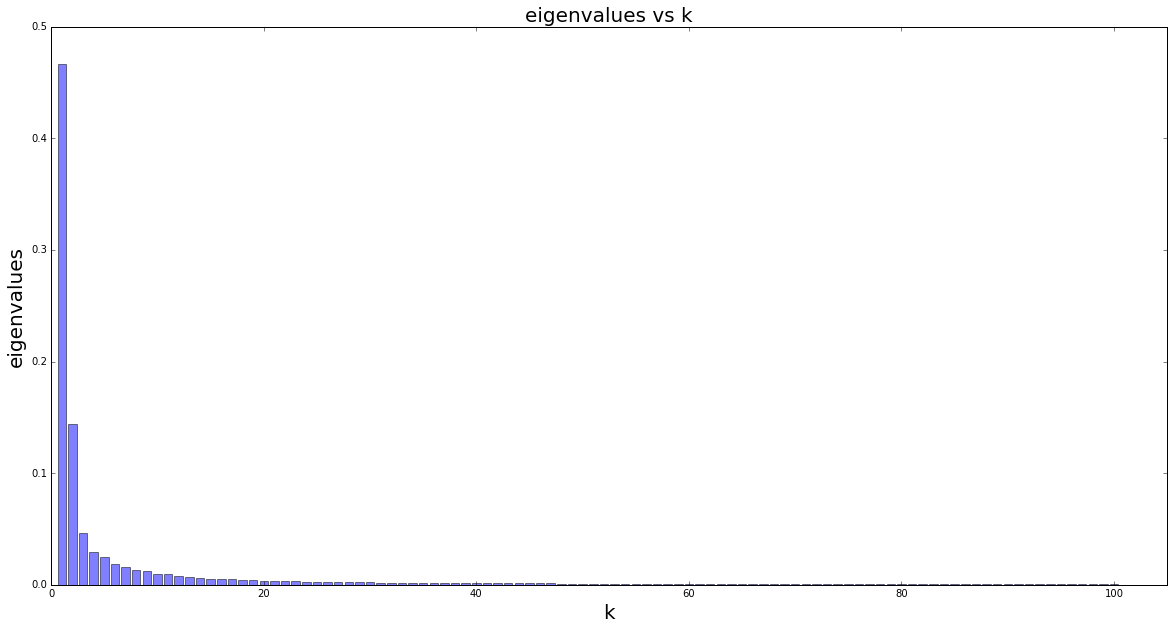

In [47]:
plt.figure(figsize=(20,10))
plt.bar(k, eigenvalues, align='center', alpha=0.5)
plt.xlim(0,105)
plt.xlabel("k", size = 20)
plt.ylabel("eigenvalues", size = 20)
plt.title("eigenvalues vs k", size = 20)

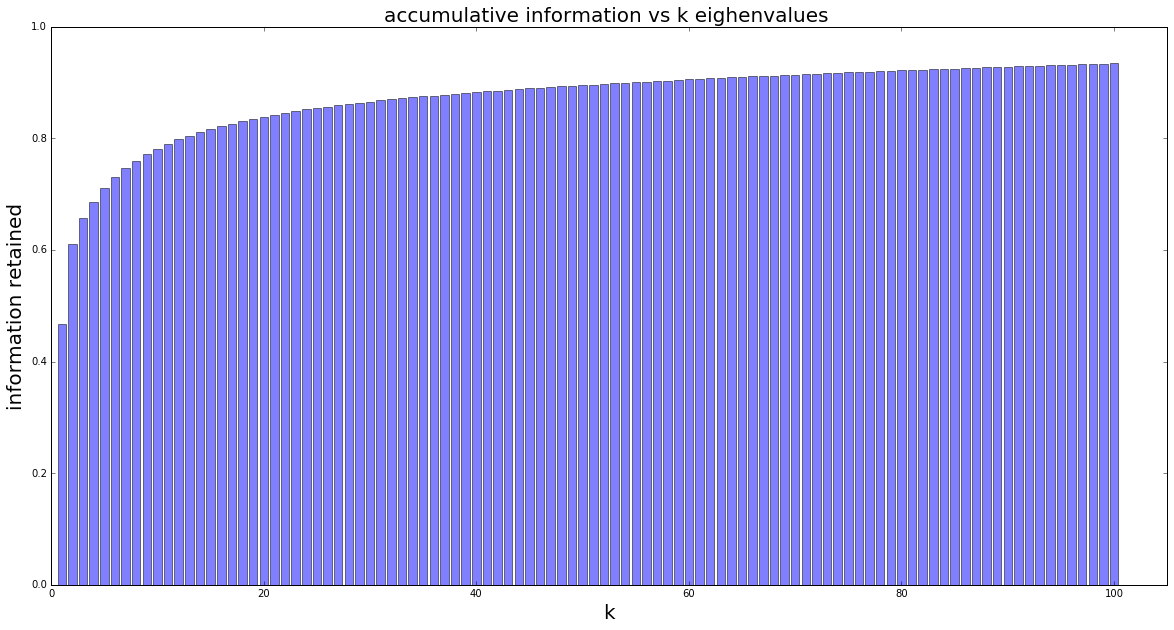

In [48]:
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.ticker import MultipleLocator
retain_information = []
total = 0
for ev in eigenvalues:
    total += ev
    retain_information.append(total)
k = range(1, 101)

plt.figure(figsize=(20,10))
plt.bar(k, retain_information, align='center', alpha=0.5)
plt.xlim(0,105)
plt.xlabel("k", size = 20)
plt.ylabel("information retained", size = 20)
plt.title("accumulative information vs k eighenvalues ", size = 20)

** Discussion **

From the graph, we could see that we could retain at least 80% information when k >= 37.

In [49]:
retain_information[11], retain_information[12]

(0.79811440225130914, 0.80486381964382203)

**Discussion**

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance, and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. 

In essence, Eigenvalue λi captures the amount of variance of the data along the dimension of i-th feature. From the graph, we could see that when we have 12 eigenvalues, we could retain 80.5% information!

## 2.2 plot the sorted eighenvectors; 
Plot the AD cases (labeled in red) and normal controls (labeled in green) in a 3D figure where the 3 coordinates correspond to the first 3 largest eighenvectors. (tip: using MatLab if you like.) Can you see a reasonable separation of the AD cases from the normal controls in your plot? Include in your solution the best plot for the best separation you can get. Repeat with a 2D plot using the first 2 largest eighenvectors. (10 pts)



## 2.2.1  3D plot 

In [50]:
pca = PCA(n_components=3)
pca.fit(train)
reduced_data = pca.transform(train)

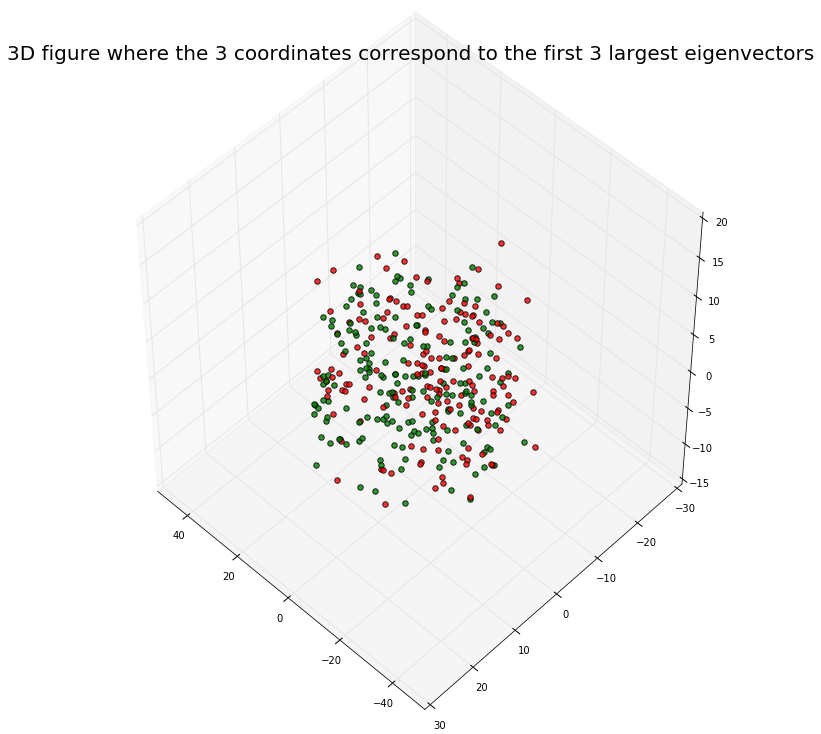

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
color = ("red", "green")
group = ("AD", "control")

# first 176 samples are ADs
for i in range(176):
    x, y, z = reduced_data[i, :]
    ax.scatter(x, y, z, alpha=0.8, c = color[0], edgecolors='none', s=30, label=group[0])
    
# the rest 188 samples are controls
for i in range(176, 364):
    x, y, z = reduced_data[i, :]
    ax.scatter(x, y, z, alpha=0.8, c = color[1], edgecolors='none', s=30, label=group[1])
    
plt.title('3D figure where the 3 coordinates correspond to the first 3 largest eigenvectors', size = 20)

## 2.2.2  2D plot 

In [52]:
pca = PCA(n_components=2)
pca.fit(train)
reduced_data = pca.transform(train)

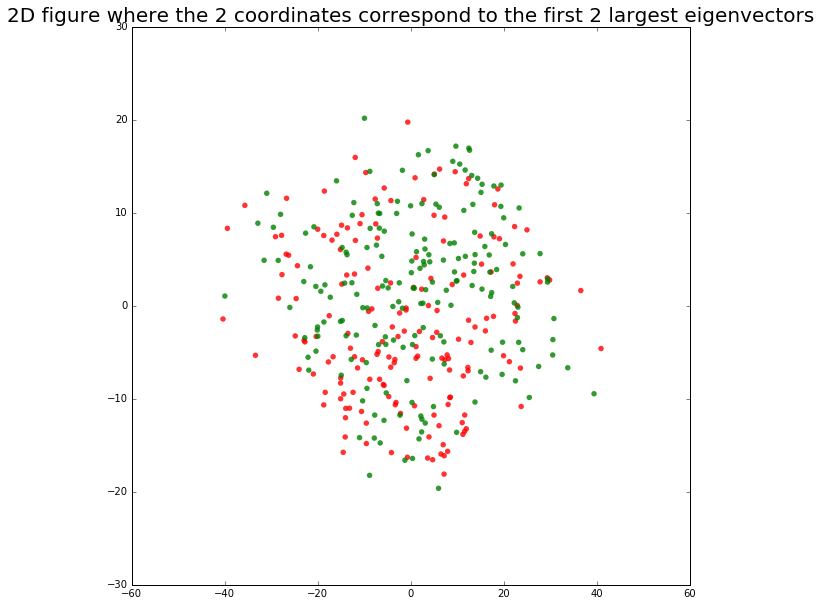

In [53]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = fig.add_subplot(1, 1, 1)

color = ("red", "green")
group = ("AD", "control")

# first 176 samples are ADs
for i in range(176):
    x, y = reduced_data[i, :]
    ax.scatter(x, y, alpha=0.8, c = color[0], edgecolors='none', s=30, label=group[0])
    
# the rest 188 samples are controls
for i in range(176, 364):
    x, y = reduced_data[i, :]
    ax.scatter(x, y, alpha=0.8, c = color[1], edgecolors='none', s=30, label=group[1])

plt.title('2D figure where the 2 coordinates correspond to the first 2 largest eigenvectors', size = 20)

** Discussion **


The separation in both 3D and 2D plot are not clear. As shown in problem 2.1, we know that the eigenvalues reflect the information retained from the original data. Using only top 3 or top 2 eigenvalues retained around 60% of the information, therefore, we won't be able to achieve good seperation between the two classes.

On the other hand, we could see that 3D plot shows a little better seperation pattern than 2D plot. In 3D plot, the green dots(normal data) are roughly on the left whereas the red dots(AD data) are roughly on the right. In 2D plot, the two classes are completely mingled together. This could be explained by the fact that top 3 eigenvalues retained more information than top 3. Therefore, we could expect better seperation when we choose more eigenvalues.

Above all, PCA is a dimension reduction method. Usually, some intrinsic patterns of the data would emerge after PCA. However, consideirng we have such a large amount of features(around 8000 features) with only around 360 samples, it would be really hard to find the good patterns of the data using just top 3 or 2 eigenvalues. But PCA possibly could help us to achieve better seperation if we further apply K-means clustering method or Guassian Mixture models.
